In [2]:
import pandas as pd
import numpy as np

#Choose dataset from Directory

In [3]:
from google.colab import files 
uploaded= files.upload()

Saving salary.csv to salary.csv


#Load dataset

In [4]:
dataset= pd.read_csv('salary.csv')

In [ ]:
print(dataset.shape)

In [6]:
dataset.head()

,age,education.num,capital.gain,hours.per.week,income
0,90,9,0,40,<=50K
1,82,9,0,18,<=50K
2,66,10,0,40,<=50K
3,54,4,0,40,<=50K
4,41,10,0,40,<=50K


#Mapping data from Text to Binary
(dataset>50K =1 and <=50K is 0)

In [7]:
income_set = set(dataset['income'])
dataset['income'] = dataset['income'].map({ '<=50K':0 ,'>50K':1}).astype(int)
print(dataset.head)

<bound method NDFrame.head of        age  education.num  capital.gain  hours.per.week  income
0       90              9             0              40       0
1       82              9             0              18       0
2       66             10             0              40       0
3       54              4             0              40       0
4       41             10             0              40       0
...    ...            ...           ...             ...     ...
32556   22             10             0              40       0
32557   27             12             0              38       0
32558   40              9             0              40       1
32559   58              9             0              40       0
32560   22              9             0              20       0

[32561 rows x 5 columns]>


#Segregating Dataset(X and Y variables)

In [8]:
X= dataset.iloc[:,:-1].values
Y= dataset.iloc[:,-1].values

In [10]:
#Splitting the dataset

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test= train_test_split(X,Y,test_size=0.25,random_state=0)

#Feature Scaling
Preprocessing the Datset 
(For train data we use fit_transform and for test data we use transform)

In [14]:
from sklearn.preprocessing import StandardScaler
sc= StandardScaler()

In [15]:
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

#Finding Best K-value

In [30]:
error= []
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

#Calculating error for K-values from 1 to 40:
for i in range(1,40):
  model= KNeighborsClassifier(n_neighbors=i)
  model.fit(X_train, Y_train)
  pred_i= model.predict(X_test)
  error.append(np.mean(pred_i != Y_test))
 

Text(0, 0.5, 'Mean Error')

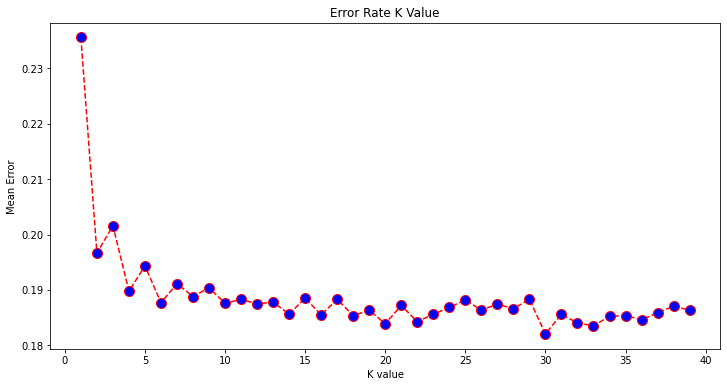

In [33]:
plt.figure(figsize=(12,6))
plt.plot(range(1,40),error, color='red',linestyle= 'dashed',marker='o', markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K value')
plt.ylabel('Mean Error')

In [34]:
##Mean Error least for K=16.

#Training

In [36]:
from sklearn.neighbors import KNeighborsClassifier
model= KNeighborsClassifier(n_neighbors=16,metric='minkowski', p=2)
model.fit(X_train, Y_train)

KNeighborsClassifier(n_neighbors=16)

#Prediction

In [39]:
age= int(input("Enter Employee Age:"))
edu= int(input("Enter Employee Education:"))
cg= int(input("Enter Employee capital Gain:"))
wh= int(input("Enter Employee Weekly Working Hours:"))
NewEmp=[[age,edu,cg,wh]]
result=model.predict(sc.transform(NewEmp))
print(result)

if result==1:
  print("Employee might get Salary above 50K")
else:
  print("Employee might get Salary below 50K")

Enter Employee Age:69
Enter Employee Education:17
Enter Employee capital Gain:0
Enter Employee Weekly Working Hours:80
[1]
Employee might get Salary above 50K


#Prediction for all Data sets

In [41]:
Y_pred= model.predict(X_test)
print(np.concatenate((Y_pred.reshape(len(Y_pred),1), Y_test.reshape(len(Y_test),1)),1))

[[0 0]
 [0 0]
 [0 0]
 ...
 [0 0]
 [0 0]
 [1 0]]


#Accuracy: Confusion Matrix

In [43]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm=confusion_matrix(Y_test,Y_pred)

print("Confusion Matrix:")
print(cm)

print("Accuracy of Model: {0}%".format(accuracy_score(Y_test, Y_pred)*100))

Confusion Matrix:
[[5864  329]
 [1181  767]]
Accuracy of Model: 81.45191008475618%
